<a href="https://colab.research.google.com/github/Gaurab-B/MRS/blob/main/Week3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [63]:
#path = "/content/drive/MyDrive/Colab Notebooks/movie_metadata.csv"
path2 = "https://github.com/Gaurab-B/MRS/blob/main/movie_metadata.csv?raw=true"
df = pd.read_csv(path2)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [64]:
df.shape #shape of the dataset

(5043, 28)

In [65]:
for col in df:  #no of columns of the dataset
    print(col)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [66]:
df.info()     #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [67]:
df.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [68]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [69]:
df[['movie_title', 'title_year', 'director_name', 'genres', 'language', 'imdb_score' , 'content_rating' ,'num_critic_for_reviews']].sample(20)  #essential colums for recommendation

,movie_title,title_year,director_name,genres,language,imdb_score,content_rating,num_critic_for_reviews
1454,Mirrors,2008.0,Alexandre Aja,Horror|Mystery,English,6.2,R,208.0
3658,Trade of Innocents,2012.0,Christopher M. Bessette,Drama|Thriller,English,5.4,PG-13,6.0
3441,Shopgirl,2005.0,Anand Tucker,Drama|Romance,English,6.4,R,124.0
1991,Underclassman,2005.0,Marcos Siega,Action|Comedy|Crime|Drama|Thriller,English,4.1,PG-13,31.0
2395,Legally Blonde,2001.0,Robert Luketic,Comedy|Romance,English,6.2,PG-13,163.0
1040,Anna Karenina,2012.0,Joe Wright,Drama|Romance,English,6.6,R,324.0
302,Where the Wild Things Are,2009.0,Spike Jonze,Adventure|Drama|Family|Fantasy,English,6.8,PG,333.0
2400,The Family Stone,2005.0,Thomas Bezucha,Comedy|Drama|Romance,English,6.3,PG-13,142.0
4830,Pieces of April,2003.0,Peter Hedges,Comedy|Drama,English,7.1,PG-13,131.0
2615,Private Benjamin,1980.0,Howard Zieff,Comedy|War,English,6.1,R,25.0


These were the code so far for this week. Below these are just me learning about pandas using this **dataframe**.

In [70]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


<Axes: >

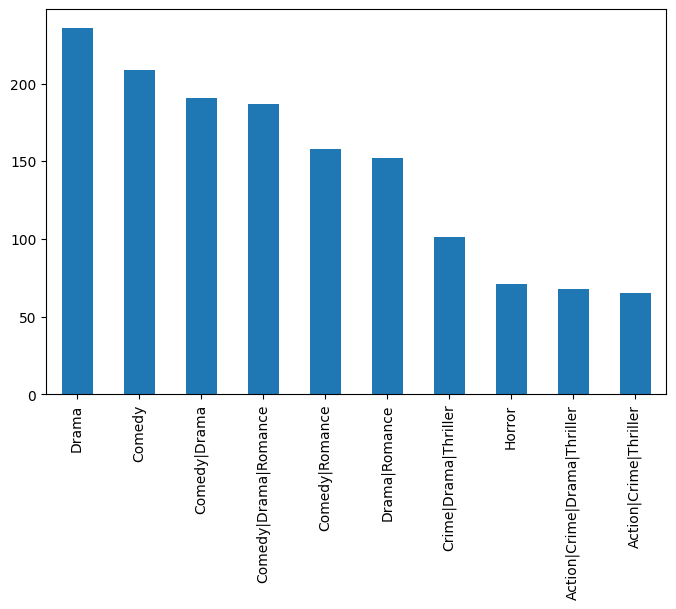

In [71]:
plt.figure(figsize=(8,5))
df['genres'].value_counts()[0:10].plot.bar()    #This line retrieves the value counts of the 'genres' column in the DataFrame df.
                                                #It counts the occurrences of each unique genre and returns a Series object

In [72]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [73]:
df['language'].value_counts()[0:10]

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Cantonese      11
Russian        11
Italian        11
Name: language, dtype: int64

In [74]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

<Axes: xlabel='num_critic_for_reviews'>

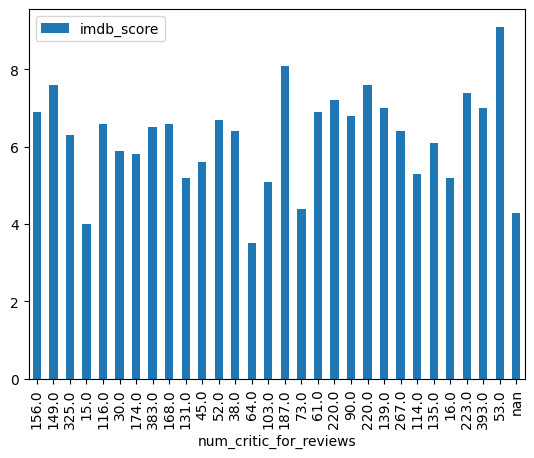

In [75]:
ps = df.sample(30)
ps.plot(x="num_critic_for_reviews", y="imdb_score", kind="bar")

<Axes: >

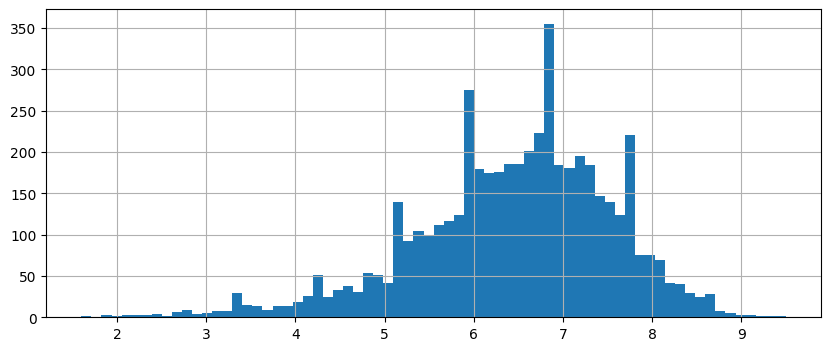

In [76]:
plt.figure(figsize = (10,4))
df['imdb_score'].hist(bins = 70)

In [77]:
dataset= df[['director_name','actor_2_name','genres','title_year','actor_1_name','movie_title','actor_3_name']]
dataset

,director_name,actor_2_name,genres,title_year,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,2009.0,CCH Pounder,Avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,2007.0,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,2015.0,Christoph Waltz,Spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action|Thriller,2012.0,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,Documentary,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Daphne Zuniga,Comedy|Drama,2013.0,Eric Mabius,Signed Sealed Delivered,Crystal Lowe
5039,NaN,Valorie Curry,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,The Following,Sam Underwood
5040,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,2013.0,Eva Boehnke,A Plague So Pleasant,David Chandler
5041,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,2012.0,Alan Ruck,Shanghai Calling,Eliza Coupe


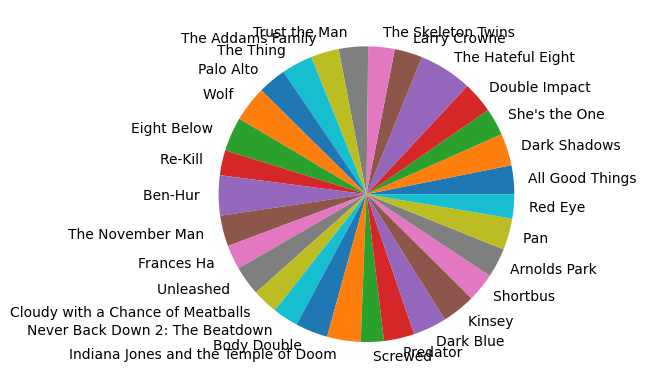

In [78]:


sampled_data = df.sample(30)

# Extract the duration and movie titles from the sampled data
duration = sampled_data['duration']
movie_titles = sampled_data['movie_title']

plt.pie(duration, labels=movie_titles)
plt.show()


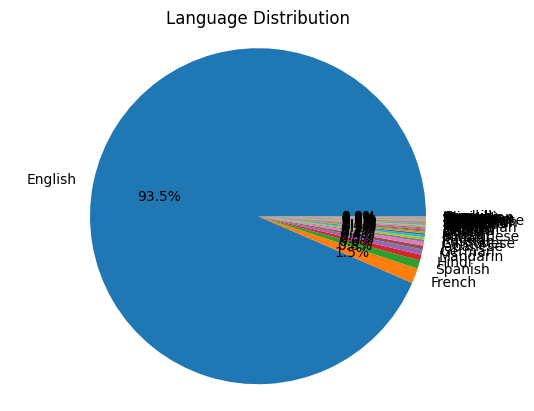

In [79]:
language_counts = df['language'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.title('Language Distribution')
plt.show()

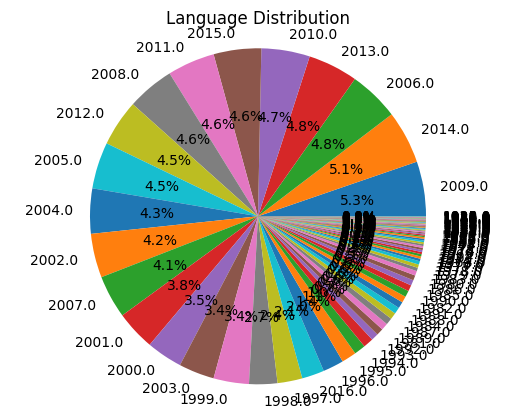

In [80]:
title_year = df['title_year'].value_counts()
plt.pie(title_year, labels=title_year.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.title('Language Distribution')
plt.show()


Below are the code starting for Week 4;

In [81]:
#DATA CLEANING
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [82]:
movies_clean = df.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','plot_keywords']] #;, means all rows. [contents] are columns
movies_clean

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,cult|fbi|hideout|prison escape|serial killer
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,NaN
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,NaN


In [83]:
movies_clean['actor_1_name'] = movies_clean['actor_1_name'].replace(np.nan, 'unknown');
movies_clean['actor_2_name'] = movies_clean['actor_2_name'].replace(np.nan, 'unknown');
movies_clean['actor_3_name'] = movies_clean['actor_3_name'].replace(np.nan, 'unknown');
movies_clean['director_name'] = movies_clean['director_name'].replace(np.nan, 'unknown');
movies_clean

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,cult|fbi|hideout|prison escape|serial killer
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,NaN
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,NaN


Now to delete the duplicate files.

In [84]:
movies_clean.drop_duplicates(subset="movie_title", keep='last',inplace=True)  #The 'inplace=True' ensures that the original 'movies' DataFrame is modified.
movies_clean

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,cult|fbi|hideout|prison escape|serial killer
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,NaN
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,NaN


In [85]:
movies_clean.isnull().sum()

director_name      0
actor_1_name       0
actor_2_name       0
actor_3_name       0
genres             0
movie_title        0
plot_keywords    151
dtype: int64

In [86]:
movies_clean = movies_clean.dropna() #remove the 151 movies.
movies_clean

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,alien|american civil war|male nipple|mars|prin...
...,...,...,...,...,...,...,...
5036,Anthony Vallone,Richard Jewell,John Considine,Sara Stepnicka,Crime|Drama,The Mongol King,jewell|mongol|nostradamus|stepnicka|vallone
5037,Edward Burns,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,Comedy|Drama,Newlyweds,written and directed by cast member
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,cult|fbi|hideout|prison escape|serial killer


In [87]:
movies_clean.sample(30)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
3266,Valeri Milev,Daniella Alonso,Roger Cross,Jesse Garcia,Action|Horror,Re-Kill,after dark|after dark horrorfest|fictional tv ...
3020,Akira Kurosawa,Tatsuo Matsumura,Tetsu Watanabe,Akira Terao,Drama,Madadayo,air raid|beer|birthday|japan|professor
1795,John Glen,Louis Jourdan,Kabir Bedi,Steven Berkoff,Action|Adventure|Thriller,Octopussy,agent|egg|faberge egg|general|russian
4252,Woody Allen,Woody Allen,John Carradine,Lynn Redgrave,Comedy,Everything You Always Wanted to Know About Sex...,aphrodisiac|court jester|jester|queen|written ...
2119,Christian Carion,Gary Lewis,Dany Boon,Ian Richardson,Drama|History|Music|Romance|War,Joyeux Noel,christmas|no man's land|soldier|trench|world w...
4301,Hue Rhodes,Peter Dinklage,Steve Buscemi,Romany Malco,Comedy|Drama,Saint John of Las Vegas,city name in title|male frontal nudity|place n...
2719,Tommy Lee Jones,Levon Helm,Dwight Yoakam,Guillermo Arriaga,Adventure|Crime|Drama|Mystery|Western,Three Burials,cemetery|friend|journey|mexico|promise
2264,Amy Heckerling,Andy Dick,Robert Miano,Zak Orth,Comedy|Romance,Loser,college|loser|love|new york city|overdose
3128,Francis Ford Coppola,Tom Cruise,William Smith,Tom Waits,Crime|Drama,The Outsiders,dysfunctional family|gang|greaser|holding some...
1187,Bruce Beresford,Bruce Greenwood,Annabeth Gish,Bruce Campbell,Crime|Mystery|Thriller,Double Jeopardy,blood|murder|sex scene|wrongful arrest|wrongfu...


In [88]:
movies_clean = movies_clean.reset_index(drop=True)
movies_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  4766 non-null   object
 1   actor_1_name   4766 non-null   object
 2   actor_2_name   4766 non-null   object
 3   actor_3_name   4766 non-null   object
 4   genres         4766 non-null   object
 5   movie_title    4766 non-null   object
 6   plot_keywords  4766 non-null   object
dtypes: object(7)
memory usage: 260.8+ KB


In [89]:
movies_clean.isnull().sum() # all the plot_keywords which were null are removed. And, the index is reset, the previous index is not added as a new column in the DataFrame.

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

In [90]:
movies_clean.loc[movies_clean['director_name'].str.contains("David", case = False)].sample(30)    #data that had david as their name

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
1136,David Zucker,Beau Mirchoff,Carmen Electra,Regina Hall,Comedy,Scary Movie 4,female nudity|male nudity|parody|reference to ...
4401,David DeCoteau,William McNamara,Tom Berenger,Randy Jay Burrell,Western,Doc Holliday's Revenge,1880s|cowboy|low budget film|shoot out|wild west
1670,David Wain,Joe Lo Truglio,Ken Marino,Bobb'e J. Thompson,Comedy,Role Models,absent father|big brother|community service|li...
4243,David Worth,Jessica Szohr,Jonathan Mangum,Angela Jones,Horror|Thriller,House at the End of the Drive,ghost story|manson family|paranormal|real life...
3550,David Gelb,Olivia Wilde,Mark Duplass,Donald Glover,Horror|Sci-Fi|Thriller,The Lazarus Effect,electrocuted|experiment|hell|serum|university
1479,David Cronenberg,Viggo Mortensen,Kyle Schmid,William Hurt,Crime|Drama|Thriller,A History of Violence,bar|crotch shot|female full frontal nudity|fem...
1774,David O. Russell,Jake Gyllenhaal,Kirstie Alley,Beverly D'Angelo,Comedy|Romance,Accidental Love,health insurance|long delayed release|nail in ...
3033,David Lynch,Sissy Spacek,Richard Farnsworth,Everett McGill,Biography|Drama,The Straight Story,cane|iowa|lawn mower|tractor|wisconsin
3765,David Schwimmer,Noah Emmerich,Jordan Trovillion,Zoe Levin,Crime|Drama|Thriller,Trust,counselor|fbi|revenge motive|school|teenage girl
696,David McNally,Estella Warren,Dyan Cannon,Bill Hunter,Action|Adventure|Comedy|Crime,Kangaroo Jack,australia|body paint|kangaroo|mob|money


In [91]:
movies_clean.loc[(movies_clean.actor_1_name.str.strip() == "Ryan Reynolds	".strip()) | (movies_clean.actor_2_name.str.strip() == "Ryan Reynolds	".strip()) | (movies_clean.actor_3_name.str.strip() == "Ryan Reynolds	".strip())]
#list of movies with ryan renolds

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
34,Martin Campbell,Ryan Reynolds,Temuera Morrison,Taika Waititi,Action|Adventure|Sci-Fi,Green Lantern,autopsy|lantern|planet|ring|test pilot
109,Gavin Hood,Hugh Jackman,Ryan Reynolds,Dominic Monaghan,Action|Adventure|Fantasy|Sci-Fi|Thriller,X-Men Origins: Wolverine,army|civil war|claw fight|commando|wolverine t...
162,David Soren,Ryan Reynolds,Snoop Dogg,Ben Schwartz,Adventure|Animation|Comedy|Family|Sport,Turbo,accident|freak accident|race|snail|underdog
183,Robert Schwentke,Ryan Reynolds,Jeff Bridges,Stephanie Szostak,Action|Comedy|Fantasy,R.I.P.D.,drug dealer|gold|partner|police|undead
217,Kirk De Micco,Ryan Reynolds,Emma Stone,Nicolas Cage,Adventure|Animation|Comedy|Family|Fantasy,The Croods,cave|caveman|journey|strict father|survival
364,Daniel Espinosa,Denzel Washington,Ryan Reynolds,Sam Shepard,Action|Crime|Mystery|Thriller,Safe House,cia|cia agent|consulate|on the run|safe house
629,David S. Goyer,Ryan Reynolds,Natasha Lyonne,John Michael Higgins,Action|Adventure|Fantasy|Horror|Sci-Fi|Thriller,Blade: Trinity,blade|blood|dracula|vampire hunter|vampire slayer
764,Tim Miller,Ryan Reynolds,Ed Skrein,Stefan Kapicic,Action|Adventure|Comedy|Romance|Sci-Fi,Deadpool,based on comic book|breaking the fourth wall|m...
867,David Dobkin,Ryan Reynolds,Olivia Wilde,Mircea Monroe,Comedy|Fantasy,The Change-Up,best friend|fountain|law firm|lawyer|sex
1123,Anne Fletcher,Ryan Reynolds,Denis O'Hare,Craig T. Nelson,Comedy|Drama|Romance,The Proposal,alaska|deportation|father son relationship|mal...


In [92]:
movies_clean.loc[(movies_clean.actor_1_name.str.strip() == "Ryan Gosling	".strip()) | (movies_clean.actor_2_name.str.strip() == "Ryan Gosling	".strip()) | (movies_clean.actor_3_name.str.strip() == "Ryan Gosling	".strip())]


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
723,Ruben Fleischer,Ryan Gosling,Brandon Molale,Wade Williams,Action|Crime|Drama|Thriller,Gangster Squad,good versus evil|machine gun|mobster|police vi...
902,Glenn Ficarra,Ryan Gosling,Emma Stone,Steve Carell,Comedy|Drama|Romance,"Crazy, Stupid, Love.",bar|divorce|friend|girl|male objectification
1513,Boaz Yakin,Ryan Gosling,Denzel Washington,Ethan Suplee,Biography|Drama|Sport,Remember the Titans,american football|based on true story|head coa...
1526,Nick Cassavetes,Ryan Gosling,Kevin Connolly,Gena Rowlands,Drama|Romance,The Notebook,class differences|letter|nursing home|second c...
1671,Adam McKay,Ryan Gosling,Christian Bale,Charlie Talbert,Biography|Comedy|Drama|History,The Big Short,bank|banking|finance|fraud|mortgage
1957,George Clooney,Ryan Gosling,Philip Seymour Hoffman,Jennifer Ehle,Drama,The Ides of March,governor|intern|manager|ohio|politics
2232,Andrew Jarecki,Ryan Gosling,Kirsten Dunst,Frank Langella,Crime|Drama|Mystery|Romance|Thriller,All Good Things,family business|friend|murder|new york city|trial
2529,Nicolas Winding Refn,Ryan Gosling,Albert Brooks,Russ Tamblyn,Crime|Drama,Drive,kissing in an elevator|mythical hero|neo noir|...
2553,Derek Cianfrance,Ryan Gosling,Ben Mendelsohn,Angelo Anthony Pizza,Crime|Drama|Thriller,The Place Beyond the Pines,bank|carnival|motorcycle|police|rookie cop
2771,Craig Gillespie,Ryan Gosling,Kelli Garner,Paul Schneider,Comedy|Drama|Romance,Lars and the Real Girl,in love with an inanimate object|internet|intr...


In [93]:
movies_clean.loc[movies_clean['movie_title'].str.strip().str.upper().str.contains("HARRY POTTER")] #.count()will return 6

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
7,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,blood|book|love|potion|professor
100,David Yates,Robert Pattinson,Daniel Radcliffe,Fiona Shaw,Adventure|Family|Fantasy|Mystery,Harry Potter and the Order of the Phoenix,battle|magic|school|teacher|wizard
101,Mike Newell,Robert Pattinson,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Goblet of Fire,fire|goblet|magic|tournament|wizard
176,Alfonso Cuarón,Daniel Radcliffe,Gary Oldman,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Prisoner of Azkaban,magic|muggle|serial killer|traitor|wizard
182,Chris Columbus,Daniel Radcliffe,Fiona Shaw,Verne Troyer,Adventure|Family|Fantasy,Harry Potter and the Sorcerer's Stone,based on novel|birthday|evil wizard|quidditch|...
256,Chris Columbus,Daniel Radcliffe,Rupert Grint,Emma Watson,Adventure|Family|Fantasy|Mystery,Harry Potter and the Chamber of Secrets,bildungsroman|flying broom|invisibility cloak|...


In [94]:
movies_clean.loc[movies_clean['movie_title'].str.strip().str.contains("HARRY pOtTeR", case=False)]


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
7,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,blood|book|love|potion|professor
100,David Yates,Robert Pattinson,Daniel Radcliffe,Fiona Shaw,Adventure|Family|Fantasy|Mystery,Harry Potter and the Order of the Phoenix,battle|magic|school|teacher|wizard
101,Mike Newell,Robert Pattinson,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Goblet of Fire,fire|goblet|magic|tournament|wizard
176,Alfonso Cuarón,Daniel Radcliffe,Gary Oldman,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Prisoner of Azkaban,magic|muggle|serial killer|traitor|wizard
182,Chris Columbus,Daniel Radcliffe,Fiona Shaw,Verne Troyer,Adventure|Family|Fantasy,Harry Potter and the Sorcerer's Stone,based on novel|birthday|evil wizard|quidditch|...
256,Chris Columbus,Daniel Radcliffe,Rupert Grint,Emma Watson,Adventure|Family|Fantasy|Mystery,Harry Potter and the Chamber of Secrets,bildungsroman|flying broom|invisibility cloak|...


In [95]:
movies_clean.loc[(movies_clean.genres=='Drama')]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
562,Oliver Stone,Frank Langella,Austin Pendleton,John Buffalo Mailer,Drama,Wall Street: Money Never Sleeps,corporate greed|crisis|economy|greed|mentor
623,Mike Newell,Julia Roberts,Kirsten Dunst,Marian Seldes,Drama,Mona Lisa Smile,art|college|school|student|wellesley college
637,David Fincher,Brad Pitt,Meat Loaf,Eugenie Bondurant,Drama,Fight Club,anti establishment|dark humor|fighting|multipl...
704,Steven Zaillian,Robert Duvall,Kathleen Quinlan,Sydney Pollack,Drama,A Civil Action,1980s|law firm|lawsuit|lawyer|toxic waste
1086,Gus Van Sant,F. Murray Abraham,Rob Brown,Michael Nouri,Drama,Finding Forrester,basketball|mentor|new york|school|writing
...,...,...,...,...,...,...,...
4729,David Gordon Green,Paul Schneider,Eddie Rouse,Damian Jewan Lee,Drama,George Washington,cover up|north carolina|redemption|small town|...
4733,Bradley Rust Gray,Zoe Kazan,Mark Rendall,Jordan Scovel,Drama,The Exploding Girl,friend|hospital|low budget film|ring|stoned
4746,Alex Kendrick,Shannen Fields,Lisa Arnold,Janet Lee Dapper,Drama,Flywheel,baby|car salesman|christian film|pregnancy|use...
4753,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,The Circle,abortion|bus|hospital|prison|prostitution


In [96]:
count_rows = movies_clean[movies_clean['genres'] == 'Drama'].shape[0]
count_rows



214

In [97]:
count_columns = movies_clean[movies_clean['genres'] == 'Drama'].shape[1]
count_columns


7

In [98]:
result = str(count_rows) + " " + str(count_columns)
result

'214 7'

In [99]:
movies_clean[movies_clean['genres'] == 'Drama'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 562 to 4755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  214 non-null    object
 1   actor_1_name   214 non-null    object
 2   actor_2_name   214 non-null    object
 3   actor_3_name   214 non-null    object
 4   genres         214 non-null    object
 5   movie_title    214 non-null    object
 6   plot_keywords  214 non-null    object
dtypes: object(7)
memory usage: 13.4+ KB


In [100]:
movies_clean.sample(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
3746,Oliver Stone,Michael Wincott,Zach Grenier,Bill Johnson,Drama,Talk Radio,listener|neo nazi|radio|radio station|radio ta...
2141,Howard Deutch,Dane Cook,Taran Killam,Riki Lindhome,Comedy|Romance,My Best Friend's Girl,breasts|female rear nudity|jesus crust pizza p...
1708,Camille Delamarre,Paul Walker,Robert Maillet,RZA,Action|Crime|Drama|Thriller,Brick Mansions,bare chested male bondage|crime lord|die hard ...
3385,Arie Posin,Rory Culkin,John Heard,Tim DeKay,Comedy|Drama,The Chumscrubber,chumscrubber|death|friend|pills|school
3718,Dan O'Bannon,Linnea Quigley,Clu Gulager,Beverly Randolph,Comedy|Horror|Sci-Fi,The Return of the Living Dead,crematorium|female frontal nudity|naked dead w...
102,Peter Berg,Will Smith,Charlize Theron,Eddie Marsan,Action|Drama,Hancock,bully comeuppance|destruction|prison|superhero...
1054,Sam Mendes,Leonardo DiCaprio,Kate Winslet,Joe Komara,Drama|Romance,Revolutionary Road,based on novel|children|connecticut|suburb|work
196,Roland Emmerich,Jake Gyllenhaal,Dennis Quaid,Sela Ward,Action|Adventure|Sci-Fi|Thriller,The Day After Tomorrow,climate|end of the world|global warming|natura...
330,Walt Becker,Bella Thorne,Joshua Mikel,Jesse McCartney,Adventure|Animation|Comedy|Family|Fantasy|Music,Alvin and the Chipmunks: The Road Chip,chipmunk|highway travel|on the road|plane|road...
4184,Frank Capra,Jean Arthur,Ann Miller,Lionel Barrymore,Comedy|Drama|Romance,You Can't Take It with You,eccentric|friend|house|monopoly|stenographer


These are all the data cleaning to be done for this week. Below I start with **Data Preprocessing**

Since we are processing text data, so we need to perform basic preprocessing skills. As we can observe from the above movies dataframe, there are

mix of low-case, upcase, special characters (|) ...
we need to combine them together as one text record for each movie in the data
So, we need to

convert all upcases to lowercases
keep only a-z, A-Z, 0-9 by removing other special characters

In [101]:
print("Build a function to apply the text cleaning techniques")

Build a function to apply the text cleaning techniques


In [102]:
import re #regularexpressions
import string

In [103]:
def clean_text_func(text):
    '''Make text lowercase, removing special characters'''
    text = text.lower()
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)    #This lambda function allows us to apply the cleaning function conveniently in a single line.

In [104]:
for col in movies_clean.columns:
    movies_clean[col+'_cleaned'] = movies_clean[col].apply(clean_text)

In [105]:
movies_clean.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,alien|american civil war|male nipple|mars|prin...,andrew stanton,daryl sabara,samantha morton,polly walker,action adventure sci fi,john carter,alien american civil war male nipple mars prin...


In [106]:
movies_clean.plot_keywords_cleaned[0]

'avatar future marine native paraplegic'

In [107]:
movies_clean.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title', 'plot_keywords', 'director_name_cleaned',
       'actor_1_name_cleaned', 'actor_2_name_cleaned', 'actor_3_name_cleaned',
       'genres_cleaned', 'movie_title_cleaned', 'plot_keywords_cleaned'],
      dtype='object')

In [108]:
movies_clean.shape

(4766, 14)

In [109]:
print("put all the information in one dataframe column")

put all the information in one dataframe column


In [110]:
if 'all_data' not in movies_clean.columns:                #this lines prevent from re-runing the data which causes multiple datasets.
    movies_clean['all_data'] = movies_clean[movies_clean.columns[7:]].apply(
        lambda x: ' '.join(x.astype(str)),
        axis=1
        )
 #makes a new colmns called all data. 7: selects all the column names starting from the 7th column (index 7) and returns them as a list.
                      #The lambda function uses the join method to concatenate the values of the row (x) into a single string.
                                                   # The astype(str) part is used to convert each value to a string before joining them.
                                                         #apply method is used on selected axis where axis = 1 means on each row.
                                                         #. This lambda function takes a row (represented as x) as input.

In [111]:
movies_clean.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned,all_data
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic,james cameron cch pounder joel david moore wes...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...,gore verbinski johnny depp orlando bloom jack ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist,sam mendes christoph waltz rory kinnear stepha...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...,christopher nolan tom hardy christian bale jos...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,alien|american civil war|male nipple|mars|prin...,andrew stanton,daryl sabara,samantha morton,polly walker,action adventure sci fi,john carter,alien american civil war male nipple mars prin...,andrew stanton daryl sabara samantha morton po...


In [112]:
movies_clean.all_data[0]

'james cameron cch pounder joel david moore wes studi action adventure fantasy sci fi avatar  avatar future marine native paraplegic'

In [123]:
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO

In [149]:
def word_cloud_generate(long_string, mask_img):
    # Create a wordcloud object
    wordcloud = WordCloud(
        background_color="white",
        contour_width=3,
        contour_color='green',
        max_words=50000,
        width=1500,
        height=1500,
        mask=mask_img,
        repeat=False,
        include_numbers=False
    )

    # Generate a word cloud
    wordcloud.generate(long_string)

    return wordcloud

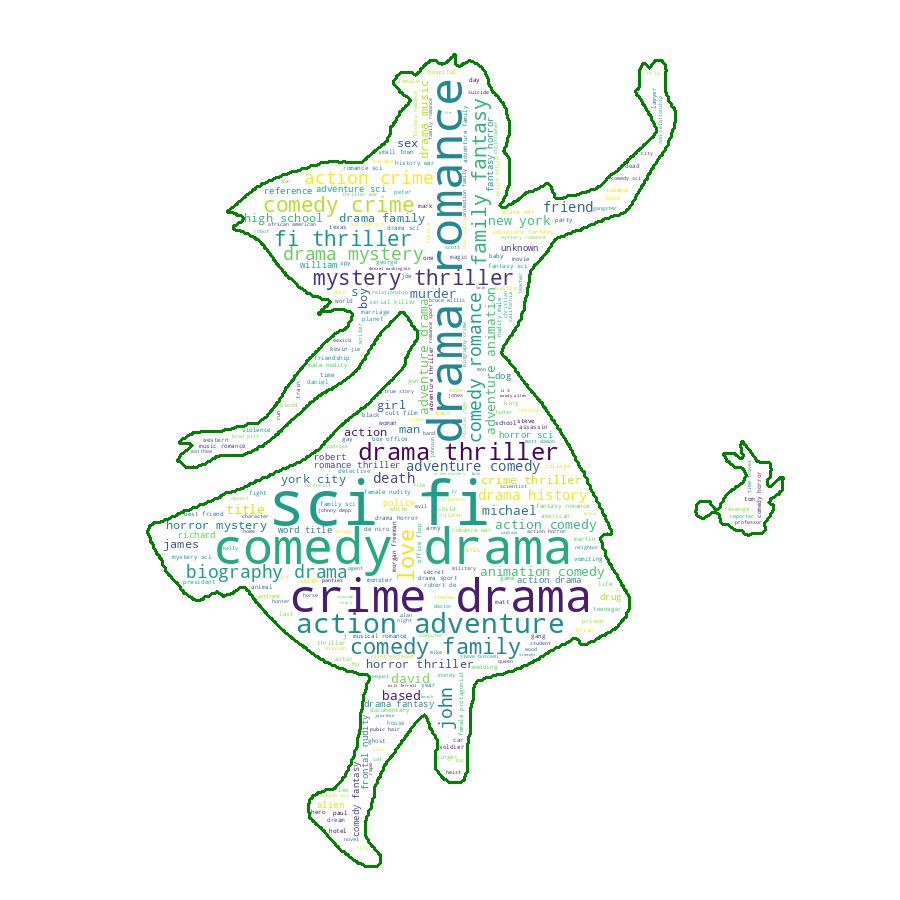

In [161]:
image_url = "https://github.com/Gaurab-B/MRS/blob/main/alice_mask.png?raw=true"
response = requests.get(image_url)
mask_img = Image.open(BytesIO(response.content)).convert("RGB")

# Example usage with a dataset or long_string_title
long_string_title = ','.join(list(movies_clean.all_data.values))
wordcloud1 = word_cloud_generate(long_string_title, np.array(mask_img))

# Visualize the word cloud with mask
wordcloud1.to_image()

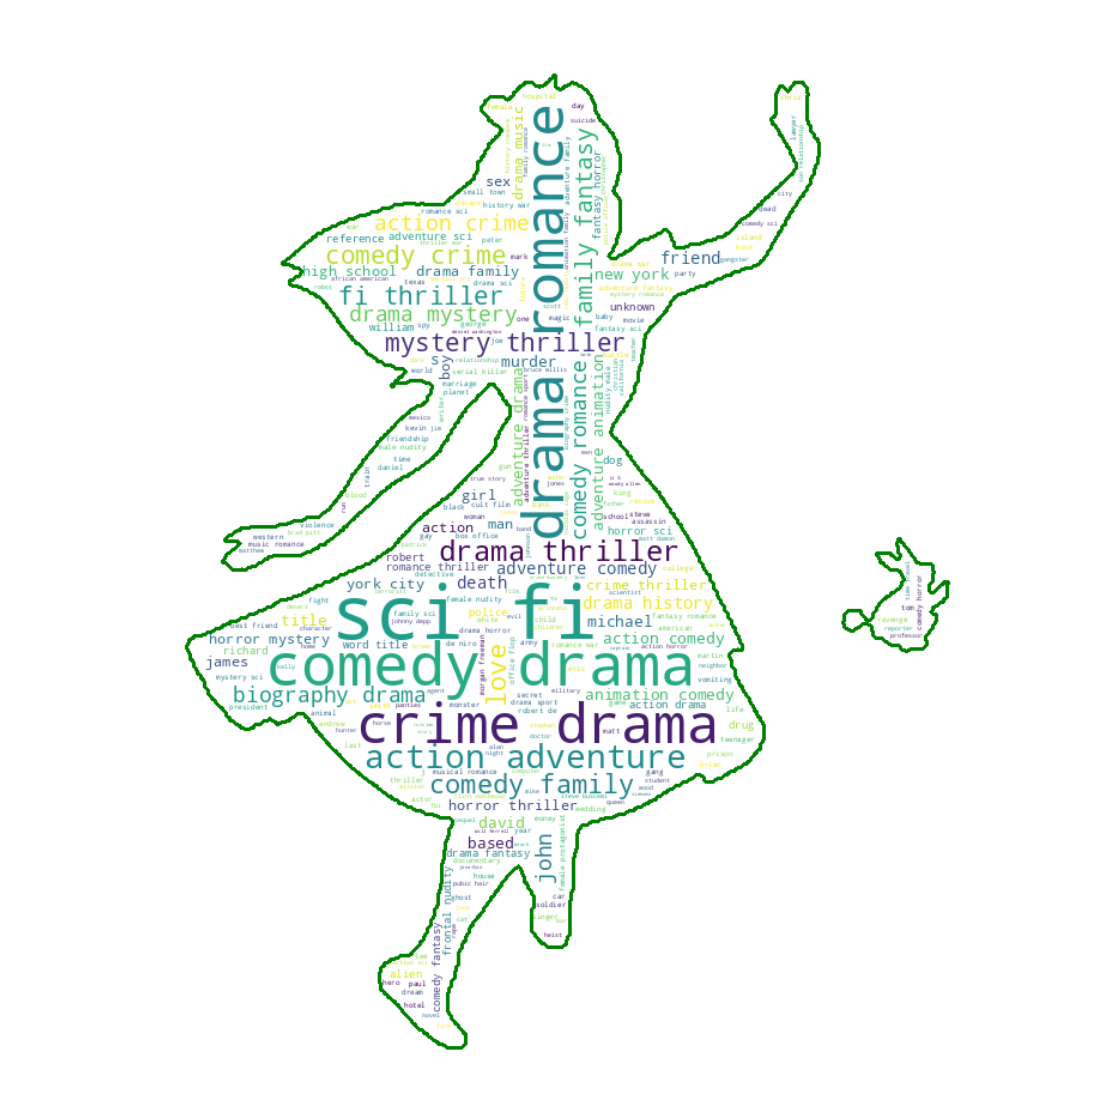

In [188]:
plt.figure( figsize=(40,14) )
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [189]:
def world_cloud_generate2(long_string):

    # create a worldcloud object
    wordcloud = WordCloud(background_color="white", max_words=50000,
                     contour_width=3, contour_color='steelblue', width=800,height=800,
                     repeat=False,include_numbers=False)
    # Generate a world cloud
    wordcloud.generate(long_string)

    return wordcloud

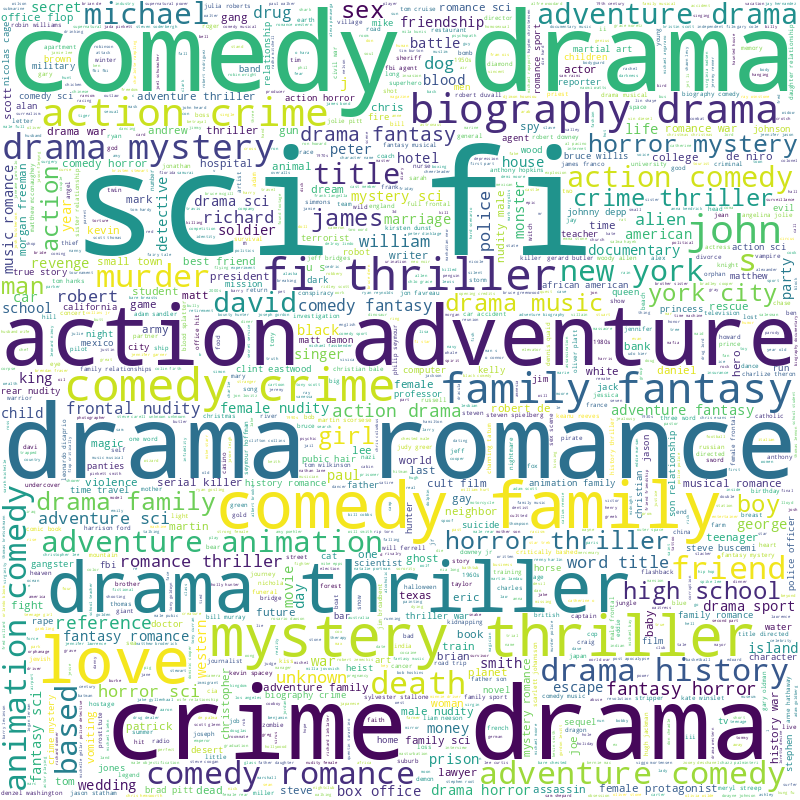

In [190]:
long_string_title = ','.join(list(movies_clean.all_data.values))
wordcloud2 = world_cloud_generate2(long_string_title)

wordcloud2.to_image()

That is all with wordcloud.
I am going to try to print about a actor from the dataset


In [277]:
from googlesearch import search
idx = 3
# Get the search query
search_query = movies_clean.actor_1_name[idx]  # Replace with movies_clean.actor_1_name_cleaned[idx]

# Perform the web search
search_results = search(search_query)

# Display the search results
for i, result in zip(range(1, 2), search_results):
    res = result
    print(res)

https://en.wikipedia.org/wiki/Tom_Hardy


I tried to extract the image. This code is from one of my previous projects. But It is just too hard to do with python and not appropriate. I would prefer using Java Script for this part. Although this is not a part of the project itself usinf json. The code only works for Tom Hardy.

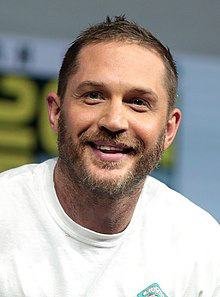

In [278]:
import requests
from PIL import Image
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Get the Wikipedia URL from user input or any other source
url = res

# Send a request to the Wikipedia page
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the image element by CSS class or other attributes
image_element = soup.find('a', class_='image').find('img')  # Replace with appropriate CSS class or attributes

# Check if the image element is found
if image_element:
    # Get the image URL
    image_url = image_element['src']
    absolute_image_url = urljoin(url, image_url)

    # Send a request to the image URL
    image_response = requests.get(absolute_image_url)

    # Read the image data from the response
    image_data = image_response.content

    # Open the image using PIL
    image = Image.open(BytesIO(image_data))

    # Display the image
    image.show()
else:
    print("Image not found on the page.")
